In [1]:
import sys
sys.path.append('../Codes/Kitas_Schools')
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import scipy.special as sc
import os.path
import pickle
from matplotlib import style
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from IPython.display import display, Math

def my_linear_func(x, a, b):
    return a + b*x
def my_quadratic_func(x, a, b, c):
    return np.log(a)+np.log(np.sqrt(-b)) + b*(x-c)**2

Text_files_path = '../../../../../Dropbox/Research/Epidemiology_2020/Text_files/Kitas_Schools/'
print(style.available)
#style.use('seaborn-paper')
%autosave 60

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Autosaving every 60 seconds


In [2]:
days = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
T = 7*8

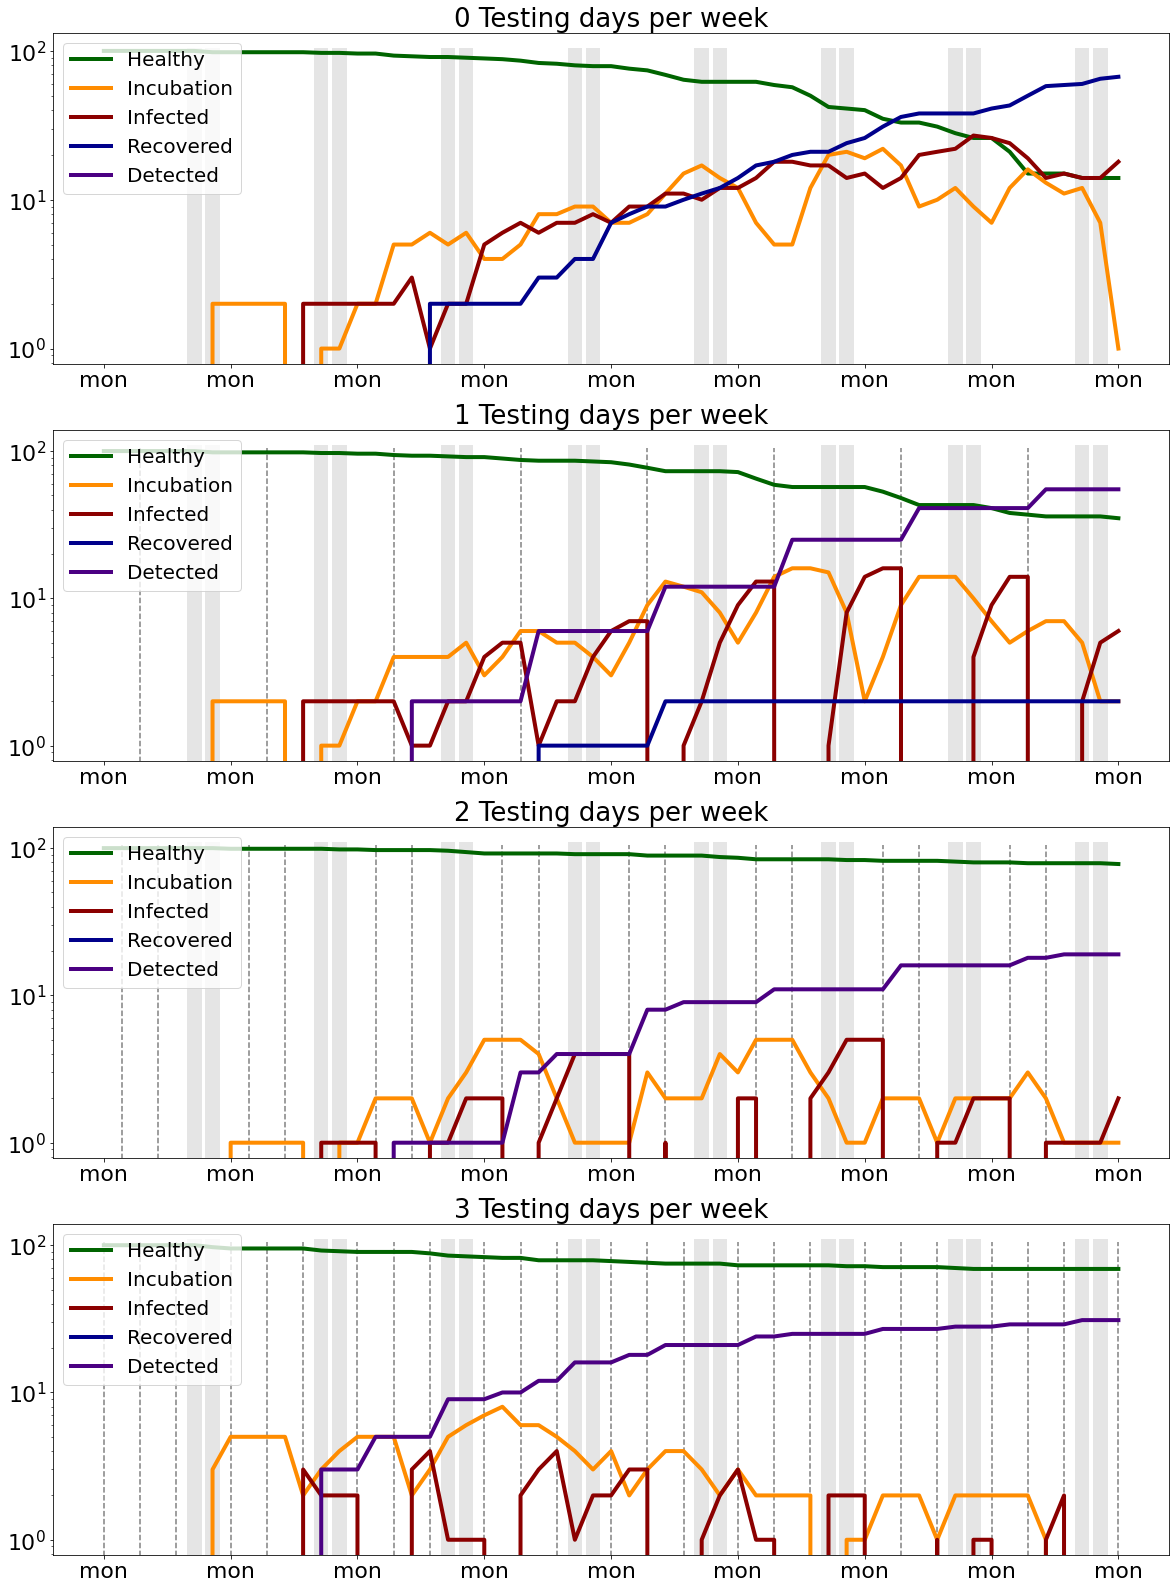

In [66]:
fig, ax = plt.subplots(4,1,figsize = (20, 7*4))
labels = ['Healthy', 'Incubation', 'Infected', 'Recovered', 'Detected']
colors = ['darkgreen', 'darkorange', 'darkred', 'darkblue', 'indigo']
Testing_days = [[], [2], [1,3], [0,2,4]]
mondays = [i for i in range(0,T+1) if (np.any(np.isin([0], i%7)))]
weekends = [i for i in range(0,T+1) if (np.any(np.isin([5,6], i%7)))]
for d in range(4):
    data = np.loadtxt(Text_files_path+"output_%d-testing_days.txt"%(d))
    testing_days = [i for i in range(0,T+1) if (np.any(np.isin(Testing_days[d], i%7)))]
    for k in range(5):
        ax[d].set_title('%d Testing days per week'%(d), fontsize = 26)
        ax[d].plot(data[:,k], linewidth = 4, color = colors[k], label = labels[k])
    ax[d].vlines(testing_days, 0, ax[d].get_ylim()[1], linestyle = 'dashed', color = 'grey')
    ax[d].bar(weekends,height = ax[d].get_ylim()[1], color = 'grey', alpha = .2)
    #ax[d].vlines(mondays, 0, ax[d].get_ylim()[1], linestyle = 'dashed', color = 'black')
    ax[d].set_xticks([i for i in range(0,T+1) if (np.any(np.isin([0], i%7)))])
    ax[d].set_xticklabels([days[i%7] for i in range(0,T+1) if (np.any(np.isin([0], i%7)))])
    ax[d].tick_params(labelsize = 22)
    ax[d].tick_params(labelsize = 22)
    ax[d].legend(loc = 2, fontsize = 20)
    ax[d].set_yscale('log')
    

fig.savefig('../../Figures/Kitas_Schools/dynamics_Kitas.pdf')

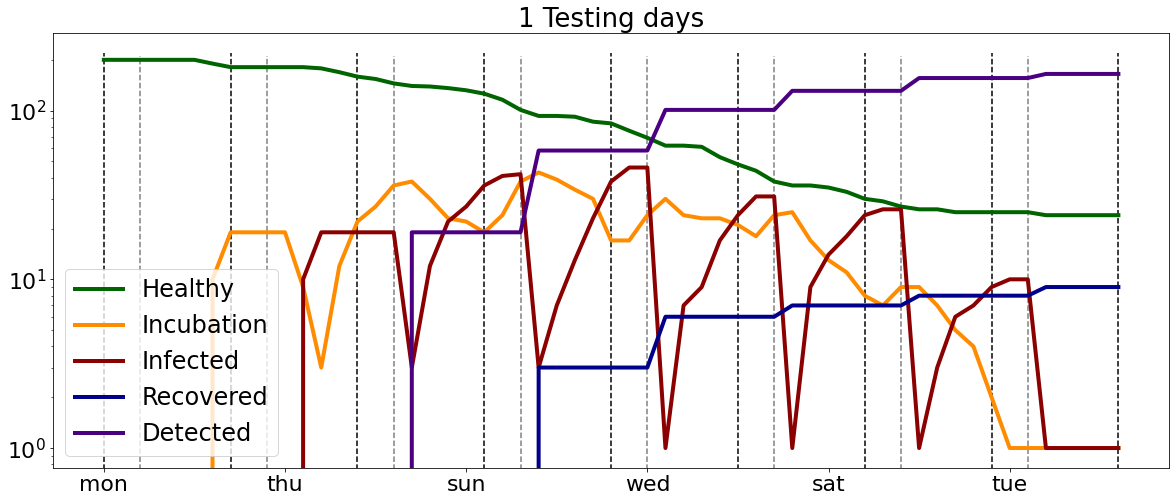

In [43]:
data = np.loadtxt(Text_files_path+"output_1-testing_days.txt")
h = data[:,0]
inc = data[:,1]
inf = data[:,2]
rec = data[:,3]
det = data[:,4]
testing_days = [i for i in range(0,T+1) if (np.any(np.isin([2], i%7)))]
mondays = [i for i in range(0,T+1) if (np.any(np.isin([0], i%7)))]

fig, ax = plt.subplots(figsize = (20, 8))
ax.set_title('%d Testing days'%(1), fontsize = 26)
ax.plot(h, linewidth = 4, color = 'darkgreen', label = 'Healthy')
ax.plot(inc, linewidth = 4, color = 'darkorange', label = 'Incubation')
ax.plot(inf, linewidth = 4, color = 'darkred', label = 'Infected')
ax.plot(rec, linewidth = 4, color = 'darkblue', label = 'Recovered')
ax.plot(det, linewidth = 4, color = 'indigo', label = 'Detected')
ax.vlines(testing_days, 0, ax.get_ylim()[1], linestyle = 'dashed', color = 'grey')
ax.vlines(mondays, 0, ax.get_ylim()[1], linestyle = 'dashed', color = 'black')
ax.tick_params(labelsize = 22)
labels = np.array([days[int(i%7)] for i in (ax.get_xticks()[1:-1])])
ax.set_xticks(ax.get_xticks()[1:-1])
ax.set_xticklabels(labels)
ax.tick_params(labelsize = 22)
ax.legend(loc = 0, fontsize = 24)
ax.set_yscale('log')

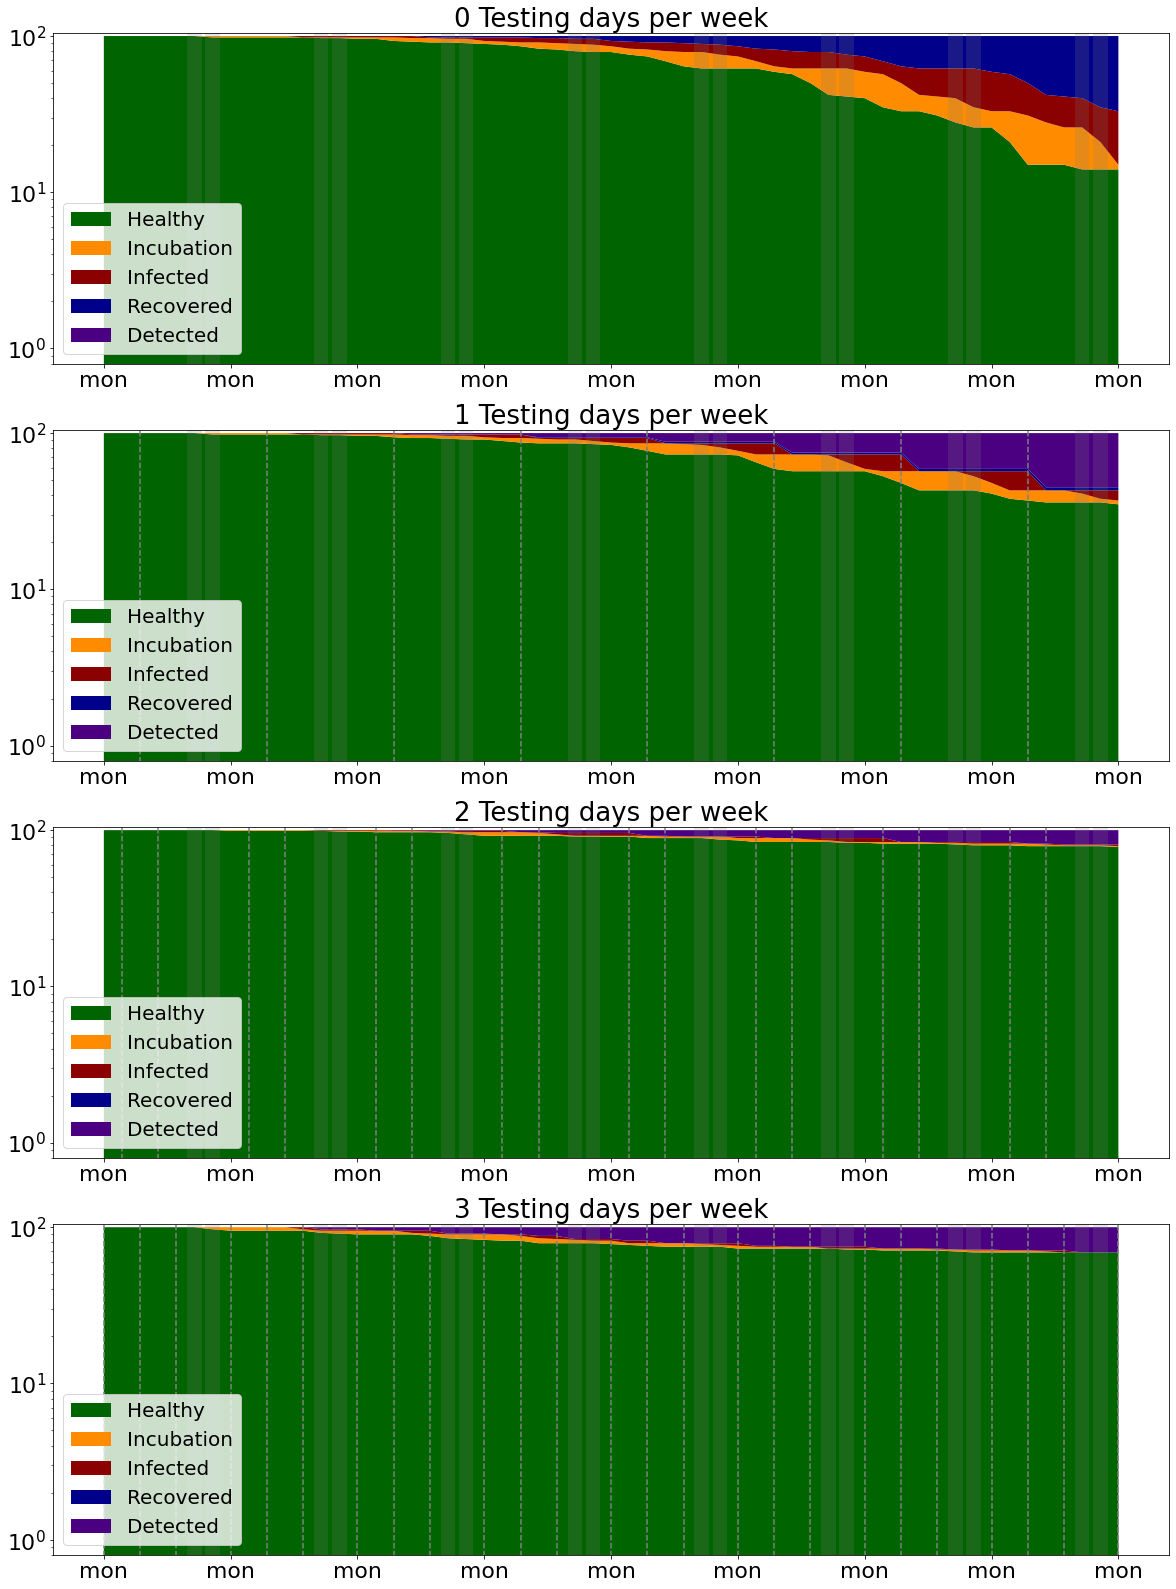

In [71]:
fig, ax = plt.subplots(4,1,figsize = (20, 7*4))

Testing_days = [[], [2], [1,3], [0,2,4]]
labels = ['Healthy', 'Incubation', 'Infected', 'Recovered', 'Detected']
colors = ['darkgreen', 'darkorange', 'darkred', 'darkblue', 'indigo']
for d in range(4):
    data = np.loadtxt(Text_files_path+"output_%d-testing_days.txt"%(d))
    h = data[:,0]
    inc = data[:,1]
    inf = data[:,2]
    rec = data[:,3]
    det = data[:,4]
    testing_days = [i for i in range(0,T+1) if (np.any(np.isin(Testing_days[d], i%7)))]
    mondays = [i for i in range(0,T+1) if (np.any(np.isin([0], i%7)))]

    ax[d].set_title('%d Testing days per week'%(d), fontsize = 26)
    ax[d].stackplot(range(T+1),data.transpose(), colors = colors, labels=labels)
    ax[d].vlines(testing_days, 0, ax[d].get_ylim()[1], linestyle = 'dashed', color = 'grey')
    #ax[d].vlines(mondays, 0, ax[d].get_ylim()[1], linestyle = 'dashed', color = 'black')
    ax[d].set_xticks([i for i in range(0,T+1) if (np.any(np.isin([0], i%7)))])
    ax[d].set_xticklabels([days[i%7] for i in range(0,T+1) if (np.any(np.isin([0], i%7)))])
    ax[d].tick_params(labelsize = 22)
    ax[d].tick_params(labelsize = 22)
    ax[d].legend(loc = 3, fontsize = 20)
    ax[d].set_yscale('log')
    ax[d].bar(weekends,height = ax[d].get_ylim()[1], color = 'grey', alpha = .2)
    ax[d].set_ylim(.8, 105)
    
fig.savefig('../../Figures/Kitas_Schools/dynamics_Kitas_stackplot.pdf')